In [51]:
import numpy as np
import pandas as pd
import plotly.express as px
import os
import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sns
%matplotlib inline
from pathlib import Path
!pip install xgboost
import xgboost as xgb

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, 
                            f1_score, 
                            confusion_matrix, 
                            classification_report,
                            confusion_matrix)
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import (train_test_split, 
                                     cross_val_score,
                                    GridSearchCV)



In [53]:
#Load Datasets
red_wine = Path('Resources/winequality-red.csv')
red_wine_df = pd.read_csv(red_wine)
red_wine_df["wine type"] = "red"
red_wine_df = red_wine_df.set_index(['wine type'])
red_wine_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
wine type,,,,,,,,,,,,
red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [54]:
# Check for duplicates
duplicates = red_wine_df[red_wine_df.duplicated()]
print(len(duplicates))

240


In [55]:
# Drop all duplicates
red_wine_df.drop_duplicates(keep='first',inplace=True)

In [56]:
white_wine = Path('Resources/winequality-white.csv')
white_wine_df = pd.read_csv(white_wine)
white_wine_df["wine type"] = "white"
white_wine_df = white_wine_df.set_index(['wine type'])
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
wine type,,,,,,,,,,,,
white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [57]:
# Check for duplicates
duplicates = white_wine_df[white_wine_df.duplicated()]
print(len(duplicates))

937


In [58]:
# Drop all duplicates
white_wine_df.drop_duplicates(keep='first',inplace=True)

In [59]:
combined_df = pd.concat([red_wine_df, white_wine_df], join="outer")
combined_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
wine type,,,,,,,,,,,,
red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [60]:
combined_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


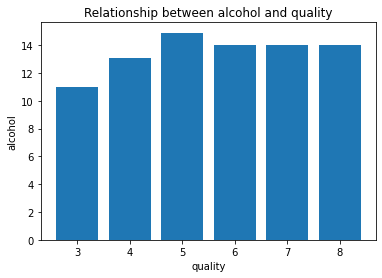

In [61]:
plt.bar(red_wine_df['quality'], red_wine_df['alcohol'])
plt.title('Relationship between alcohol and quality')
plt.xlabel('quality')
plt.ylabel('alcohol')

plt.show()

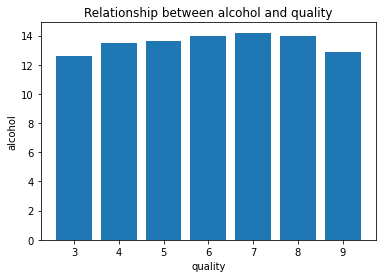

In [90]:
plt.bar(white_wine_df['quality'], white_wine_df['alcohol'])
plt.title('Relationship between alcohol and quality')
plt.xlabel('quality')
plt.ylabel('alcohol')

plt.show()

# Convert the dataset to a Classification Problem (Red Wines):

In [62]:
red_wine_df["good wine"] = ["yes" if i >= 6 else "no" for i in red_wine_df['quality']]

## create features X and target variable y:

In [63]:
X = red_wine_df.drop(["quality"], axis = 1)
y = red_wine_df["good wine"]

In [64]:
y.value_counts()

yes    719
no     640
Name: good wine, dtype: int64

C:\Users\rmwil\anaconda3\envs\pyvizenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


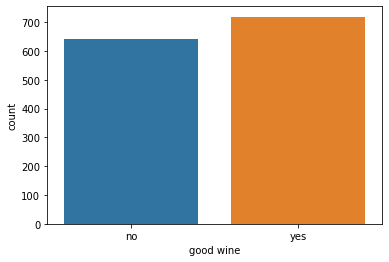

In [65]:
sns.countplot(y)
plt.show()

In [66]:
red_wine_df["good wine"] = ["1" if i >= 6 else "0" for i in red_wine_df['quality']]
rw_df = red_wine_df.copy()
rw_df = rw_df.drop(['quality'], axis=1)
rw_df['good wine'] = rw_df['good wine'].astype(int)
rw_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good wine
wine type,,,,,,,,,,,,
red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


## Test/Train Split - Red Wine

In [67]:
# The target variable
y = rw_df['good wine']

In [68]:
# Drop target and set the dependent values variables 
X = rw_df.drop('good wine', axis=1) 

In [69]:
# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Scaling the Data

In [70]:
# Applying Standard scaling to get optimized result
stdscr = StandardScaler()
X_train = stdscr.fit_transform(X_train)
# Remember to keep the test data seperate!
X_test = stdscr.fit_transform(X_test)

## XGBoost

In [71]:
# XGB classifier
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

xgb_training_preds = xgb_clf.predict(X_train)
xgb_training_accuracy = accuracy_score(y_train, xgb_training_preds)

xgb_val_preds = xgb_clf.predict(X_test)
xgb_val_accuracy = accuracy_score(y_test, xgb_val_preds)

print("XGB Training Accuracy: {:.4}%".format(xgb_training_accuracy * 100))
print("XGB Validation accuracy: {:.4}%".format(xgb_val_accuracy * 100))

C:\Users\rmwil\anaconda3\envs\pyvizenv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:12:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Training Accuracy: 100.0%
XGB Validation accuracy: 74.12%


In [72]:
# XGB classification report
print(classification_report(y_test, xgb_val_preds))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       164
           1       0.74      0.77      0.76       176

    accuracy                           0.74       340
   macro avg       0.74      0.74      0.74       340
weighted avg       0.74      0.74      0.74       340



In [73]:
# Regular confusion matrix
xgb_matrix = confusion_matrix(y_test, xgb_val_preds)
print('Confusion Matrix:\n', xgb_matrix)

Confusion Matrix:
 [[116  48]
 [ 40 136]]


## KNN Model- Red Wine

In [74]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

knn_training_preds = knn_clf.predict(X_train)
knn_training_accuracy = accuracy_score(y_train, knn_training_preds)

knn_val_preds = knn_clf.predict(X_test)
knn_val_accuracy = accuracy_score(y_test, knn_val_preds)

print("KNN Training Accuracy: {:.4}%".format(knn_training_accuracy * 100))
print("KNN Validation accuracy: {:.4}%".format(knn_val_accuracy * 100))

KNN Training Accuracy: 80.37%
KNN Validation accuracy: 68.53%


In [75]:
# KNN classification report
print(classification_report(y_test, knn_val_preds))

              precision    recall  f1-score   support

           0       0.68      0.65      0.66       164
           1       0.69      0.72      0.70       176

    accuracy                           0.69       340
   macro avg       0.69      0.68      0.68       340
weighted avg       0.69      0.69      0.68       340



In [76]:
# Regular confusion matrix
knn_matrix = confusion_matrix(y_test, knn_val_preds)
print('Confusion Matrix:\n', knn_matrix)

Confusion Matrix:
 [[106  58]
 [ 49 127]]


# Convert the dataset to a Classification Problem (White Wines):

## create features X and target variable y:

In [77]:
white_wine_df["good wine"] = ["1" if i >= 6 else "0" for i in white_wine_df['quality']]
ww_df = white_wine_df.copy()
ww_df = ww_df.drop(['quality'], axis=1)
ww_df['good wine'] = ww_df['good wine'].astype(int)
ww_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good wine
wine type,,,,,,,,,,,,
white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1
white,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,1


In [78]:
X_w = ww_df.drop(["good wine"], axis = 1)
y_w = ww_df["good wine"]

In [79]:
y.value_counts()

1    719
0    640
Name: good wine, dtype: int64

C:\Users\rmwil\anaconda3\envs\pyvizenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


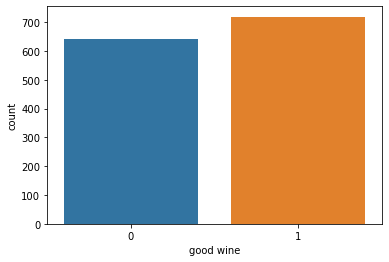

In [80]:
sns.countplot(y)
plt.show()

In [81]:
# The target variable
y_w = ww_df['good wine']

In [82]:
# Drop target and set the dependent values variables 
X_w = ww_df.drop('good wine', axis=1) 

In [83]:
# Split into training and test sets
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_w, y_w, test_size=0.25, random_state=42)

## Scaling the Data

In [84]:
# Applying Standard scaling to get optimized result
stdscr = StandardScaler()
X_train_w = stdscr.fit_transform(X_train_w)
# Remember to keep the test data seperate!
X_test_w = stdscr.fit_transform(X_test_w)

## XGBoost - White Wine

In [85]:
# XGB classifier
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train_w, y_train_w)

xgb_training_preds = xgb_clf.predict(X_train_w)
xgb_training_accuracy = accuracy_score(y_train_w, xgb_training_preds)

xgb_val_preds = xgb_clf.predict(X_test_w)
xgb_val_accuracy = accuracy_score(y_test_w, xgb_val_preds)

print("XGB Training Accuracy: {:.4}%".format(xgb_training_accuracy * 100))
print("XGB Validation accuracy: {:.4}%".format(xgb_val_accuracy * 100))

C:\Users\rmwil\anaconda3\envs\pyvizenv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:12:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Training Accuracy: 99.53%
XGB Validation accuracy: 74.57%


In [86]:
# XGB classification report
print(classification_report(y_test_w, xgb_val_preds))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61       340
           1       0.79      0.83      0.81       651

    accuracy                           0.75       991
   macro avg       0.72      0.71      0.71       991
weighted avg       0.74      0.75      0.74       991



## KNN Model- White Wine

In [87]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_w, y_train_w)

knn_training_preds = knn_clf.predict(X_train_w)
knn_training_accuracy = accuracy_score(y_train_w, knn_training_preds)

knn_val_preds = knn_clf.predict(X_test_w)
knn_val_accuracy = accuracy_score(y_test_w, knn_val_preds)

print("KNN Training Accuracy: {:.4}%".format(knn_training_accuracy * 100))
print("KNN Validation accuracy: {:.4}%".format(knn_val_accuracy * 100))

KNN Training Accuracy: 82.59%
KNN Validation accuracy: 74.27%


In [88]:
# KNN classification report
print(classification_report(y_test_w, knn_val_preds))

              precision    recall  f1-score   support

           0       0.64      0.57      0.60       340
           1       0.79      0.83      0.81       651

    accuracy                           0.74       991
   macro avg       0.71      0.70      0.71       991
weighted avg       0.74      0.74      0.74       991



In [89]:
# Regular confusion matrix
knn_matrix = confusion_matrix(y_test_w, knn_val_preds)
print('Confusion Matrix:\n', knn_matrix)

Confusion Matrix:
 [[194 146]
 [109 542]]
